### Evaluation TSA checkpoint numbers
- TSA checkpoint numbers can be found: https://www.tsa.gov/coronavirus/passenger-throughput
- Travel is down ~90% year over year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [2]:
colors = {
    'top': '#C20051',
    'middle': '#90A5ED',
    'bottom': '#EFF2FE'
}

In [3]:
tsa = pd.read_csv('../data/tsa_numbers.csv')
tsa['date'] = pd.to_datetime(tsa['date'])
tsa.sort_values('date', ascending=True, inplace=True)
print(tsa.shape)
tsa.head()

(159, 3)


,date,passengers,passengers_year_ago
158,2020-03-01,2280522,2301439
157,2020-03-02,2089641,2257920
156,2020-03-03,1736393,1979558
155,2020-03-04,1877401,2143619
154,2020-03-05,2130015,2402692


In [4]:
# Calculate current passenger percent of previous years count
tsa['yearly_relative_percent'] = tsa['passengers'] / tsa['passengers_year_ago'] * 100

# Calculate percent change in passengers week over week
tsa['weekly_percent_change_2020'] = tsa['passengers'].pct_change(periods=7) * 100
tsa['weekly_percent_change_2019'] = tsa['passengers_year_ago'].pct_change(periods=7) * 100

tsa.tail(8)

,date,passengers,passengers_year_ago,yearly_relative_percent,weekly_percent_change_2020,weekly_percent_change_2019
7,2020-07-30,718310,2742882,26.188148,1.914687,1.385489
6,2020-07-31,767320,2730936,28.097326,5.870828,-0.067111
5,2020-08-01,709033,2367967,29.942689,9.245532,0.128630
4,2020-08-02,799861,2688640,29.749650,6.477060,-0.447399
3,2020-08-03,737235,2619406,28.145121,5.312816,0.231887
2,2020-08-04,543601,2387115,22.772300,1.275254,-2.125982
1,2020-08-05,595739,2430094,24.515060,3.932135,-4.416006
0,2020-08-06,743599,2707986,27.459485,3.520625,-1.272238


In [5]:
print('Down year over year:', 100 - tsa.loc[tsa['date'] == tsa['date'].max(), 'yearly_relative_percent'].values[0])
print('Week over week change:', tsa.loc[tsa['date'] == tsa['date'].max(), 'weekly_percent_change_2020'].values[0])

Down year over year: 72.54051534978393
Week over week change: 3.520624799877492


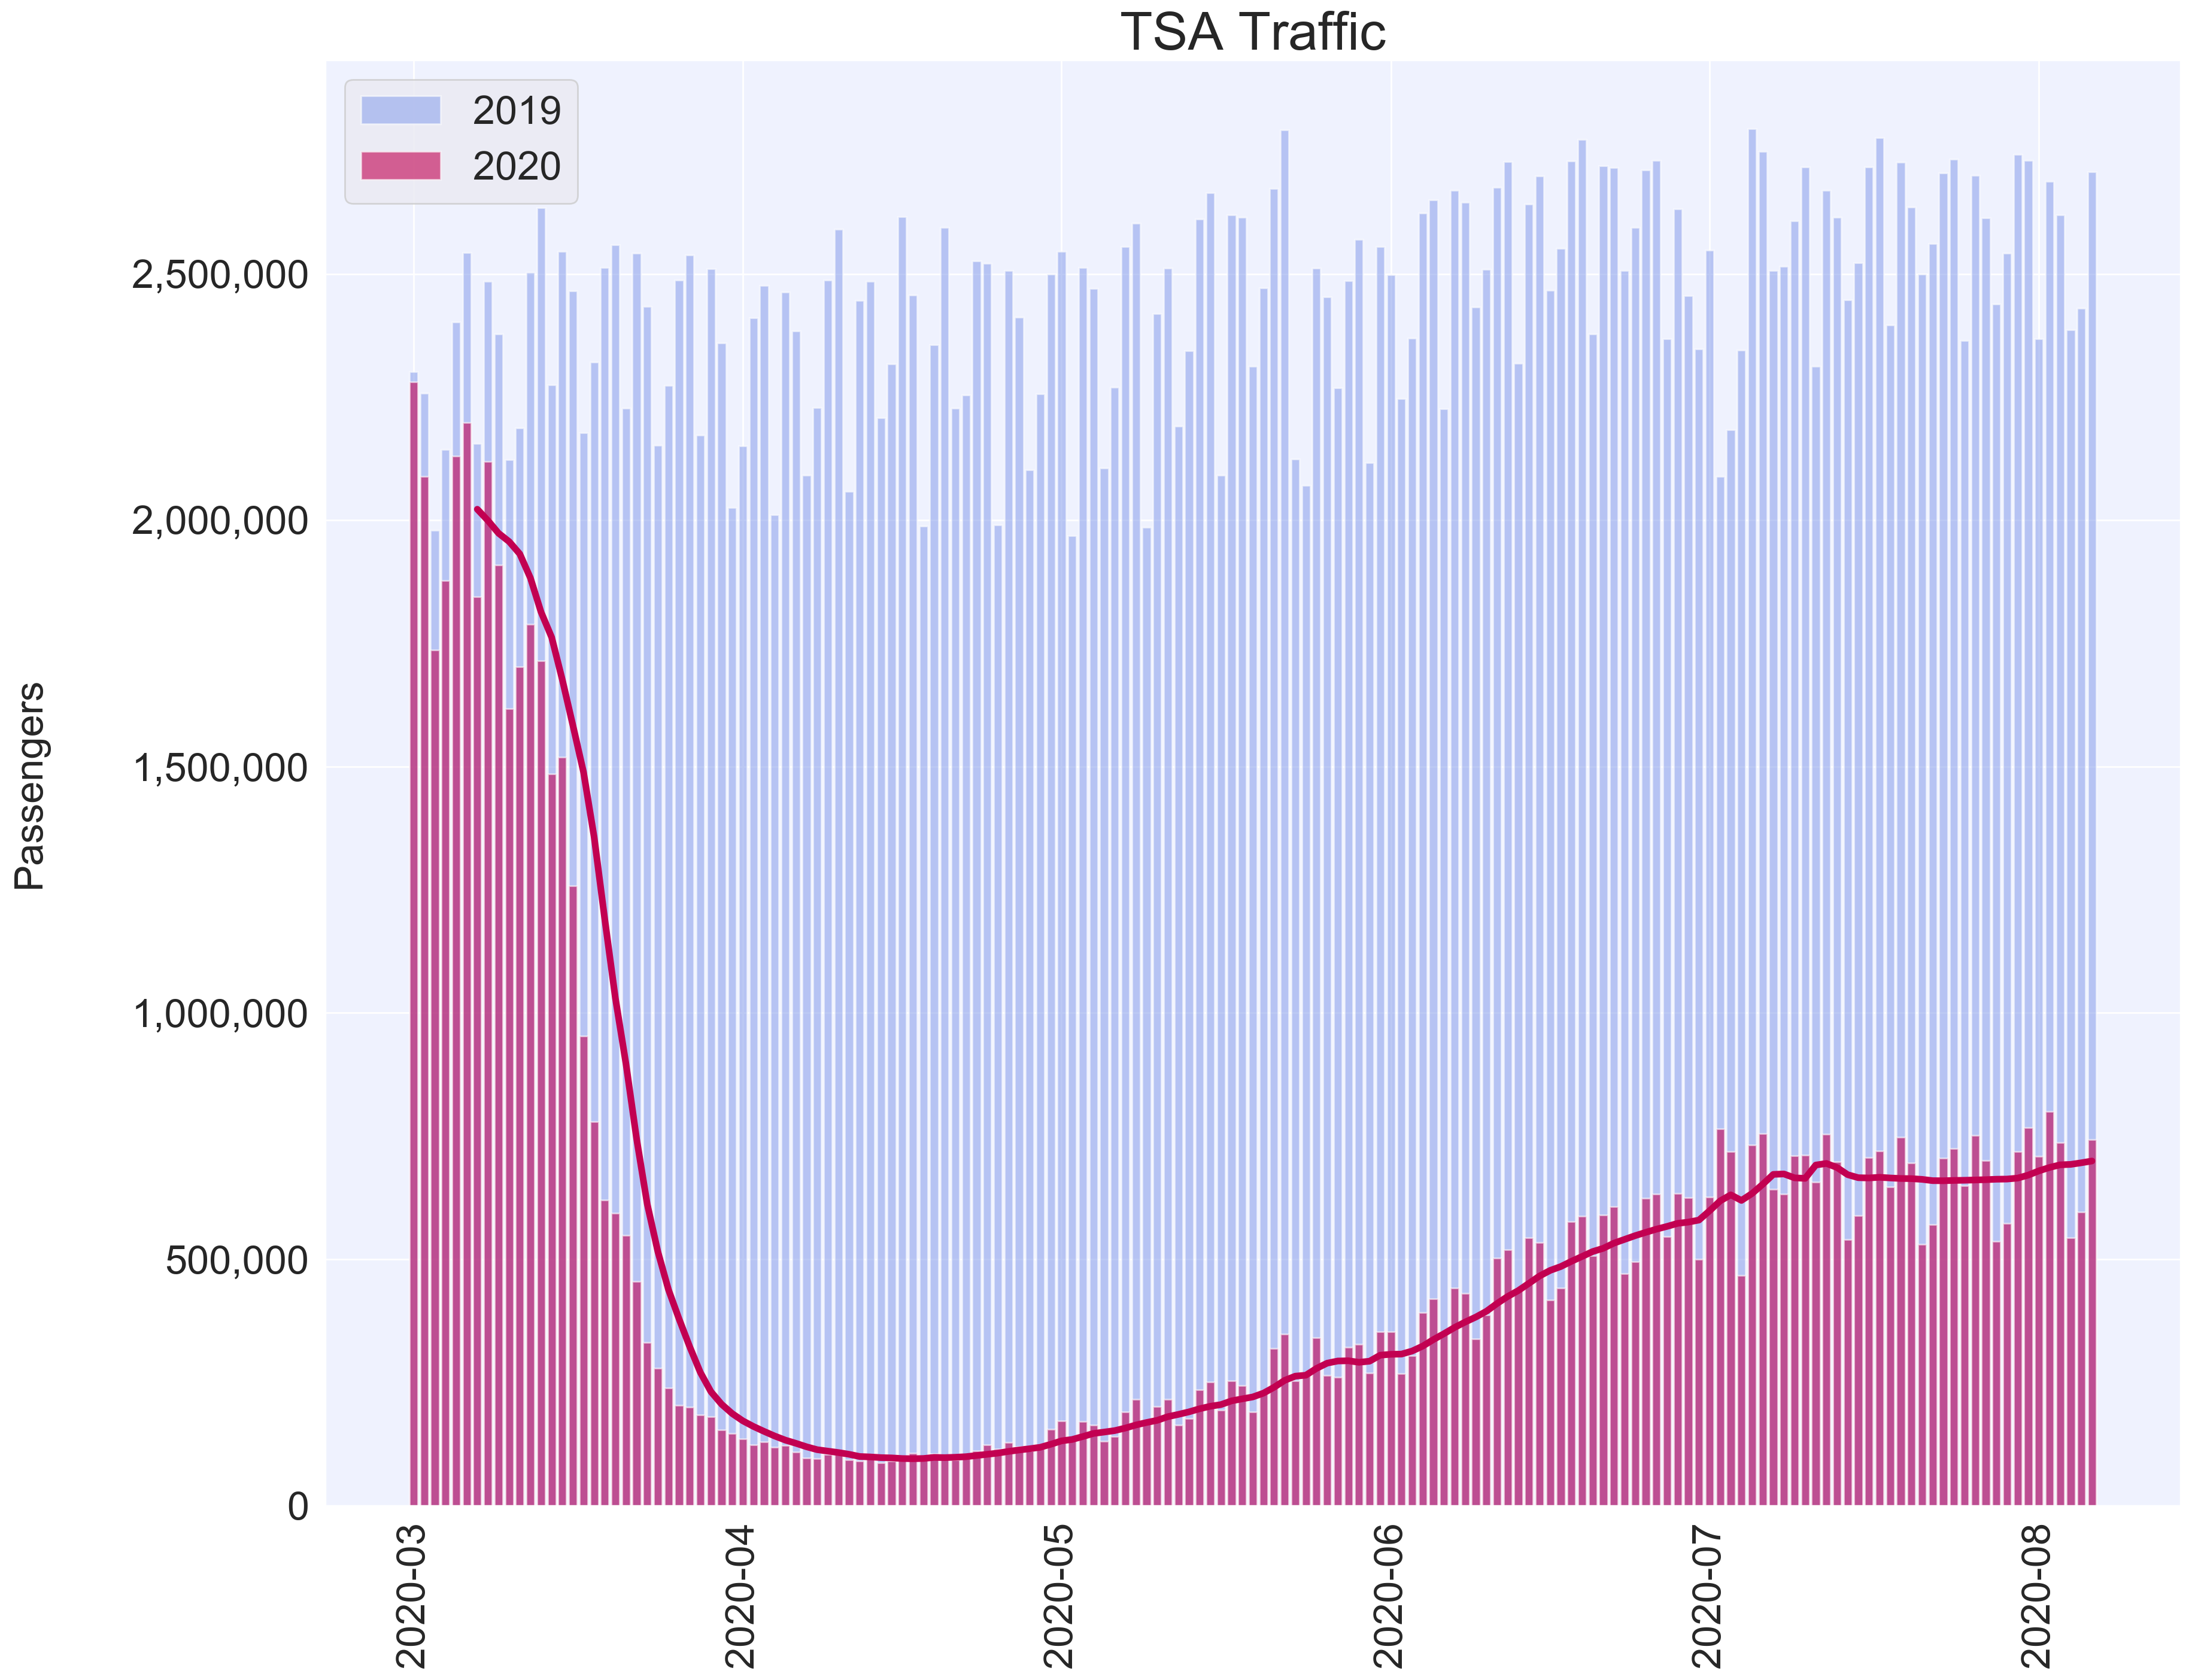

In [6]:
# Distribution of counts
fig, ax = plt.subplots(figsize=(20,16), dpi=200)

ax.bar(tsa['date'], tsa['passengers_year_ago'], color='#90A5ED', alpha=0.6, label='2019')
ax.plot(tsa['date'], tsa['passengers'].rolling(7).mean(), c='#C20051', linewidth=4.0)
ax.bar(tsa['date'], tsa['passengers'], color='#C20051', alpha=0.6, label='2020')

ax.set_facecolor('#EFF2FE')
ax.set_title('TSA Traffic', fontsize=32)
ax.set_ylabel('Passengers', fontsize=24, labelpad=50)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.xaxis.set_tick_params(rotation=90)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.legend(fontsize=24)
plt.savefig('../images/tsa_counts.png', bbox_inches='tight', dpi=200)
plt.show()

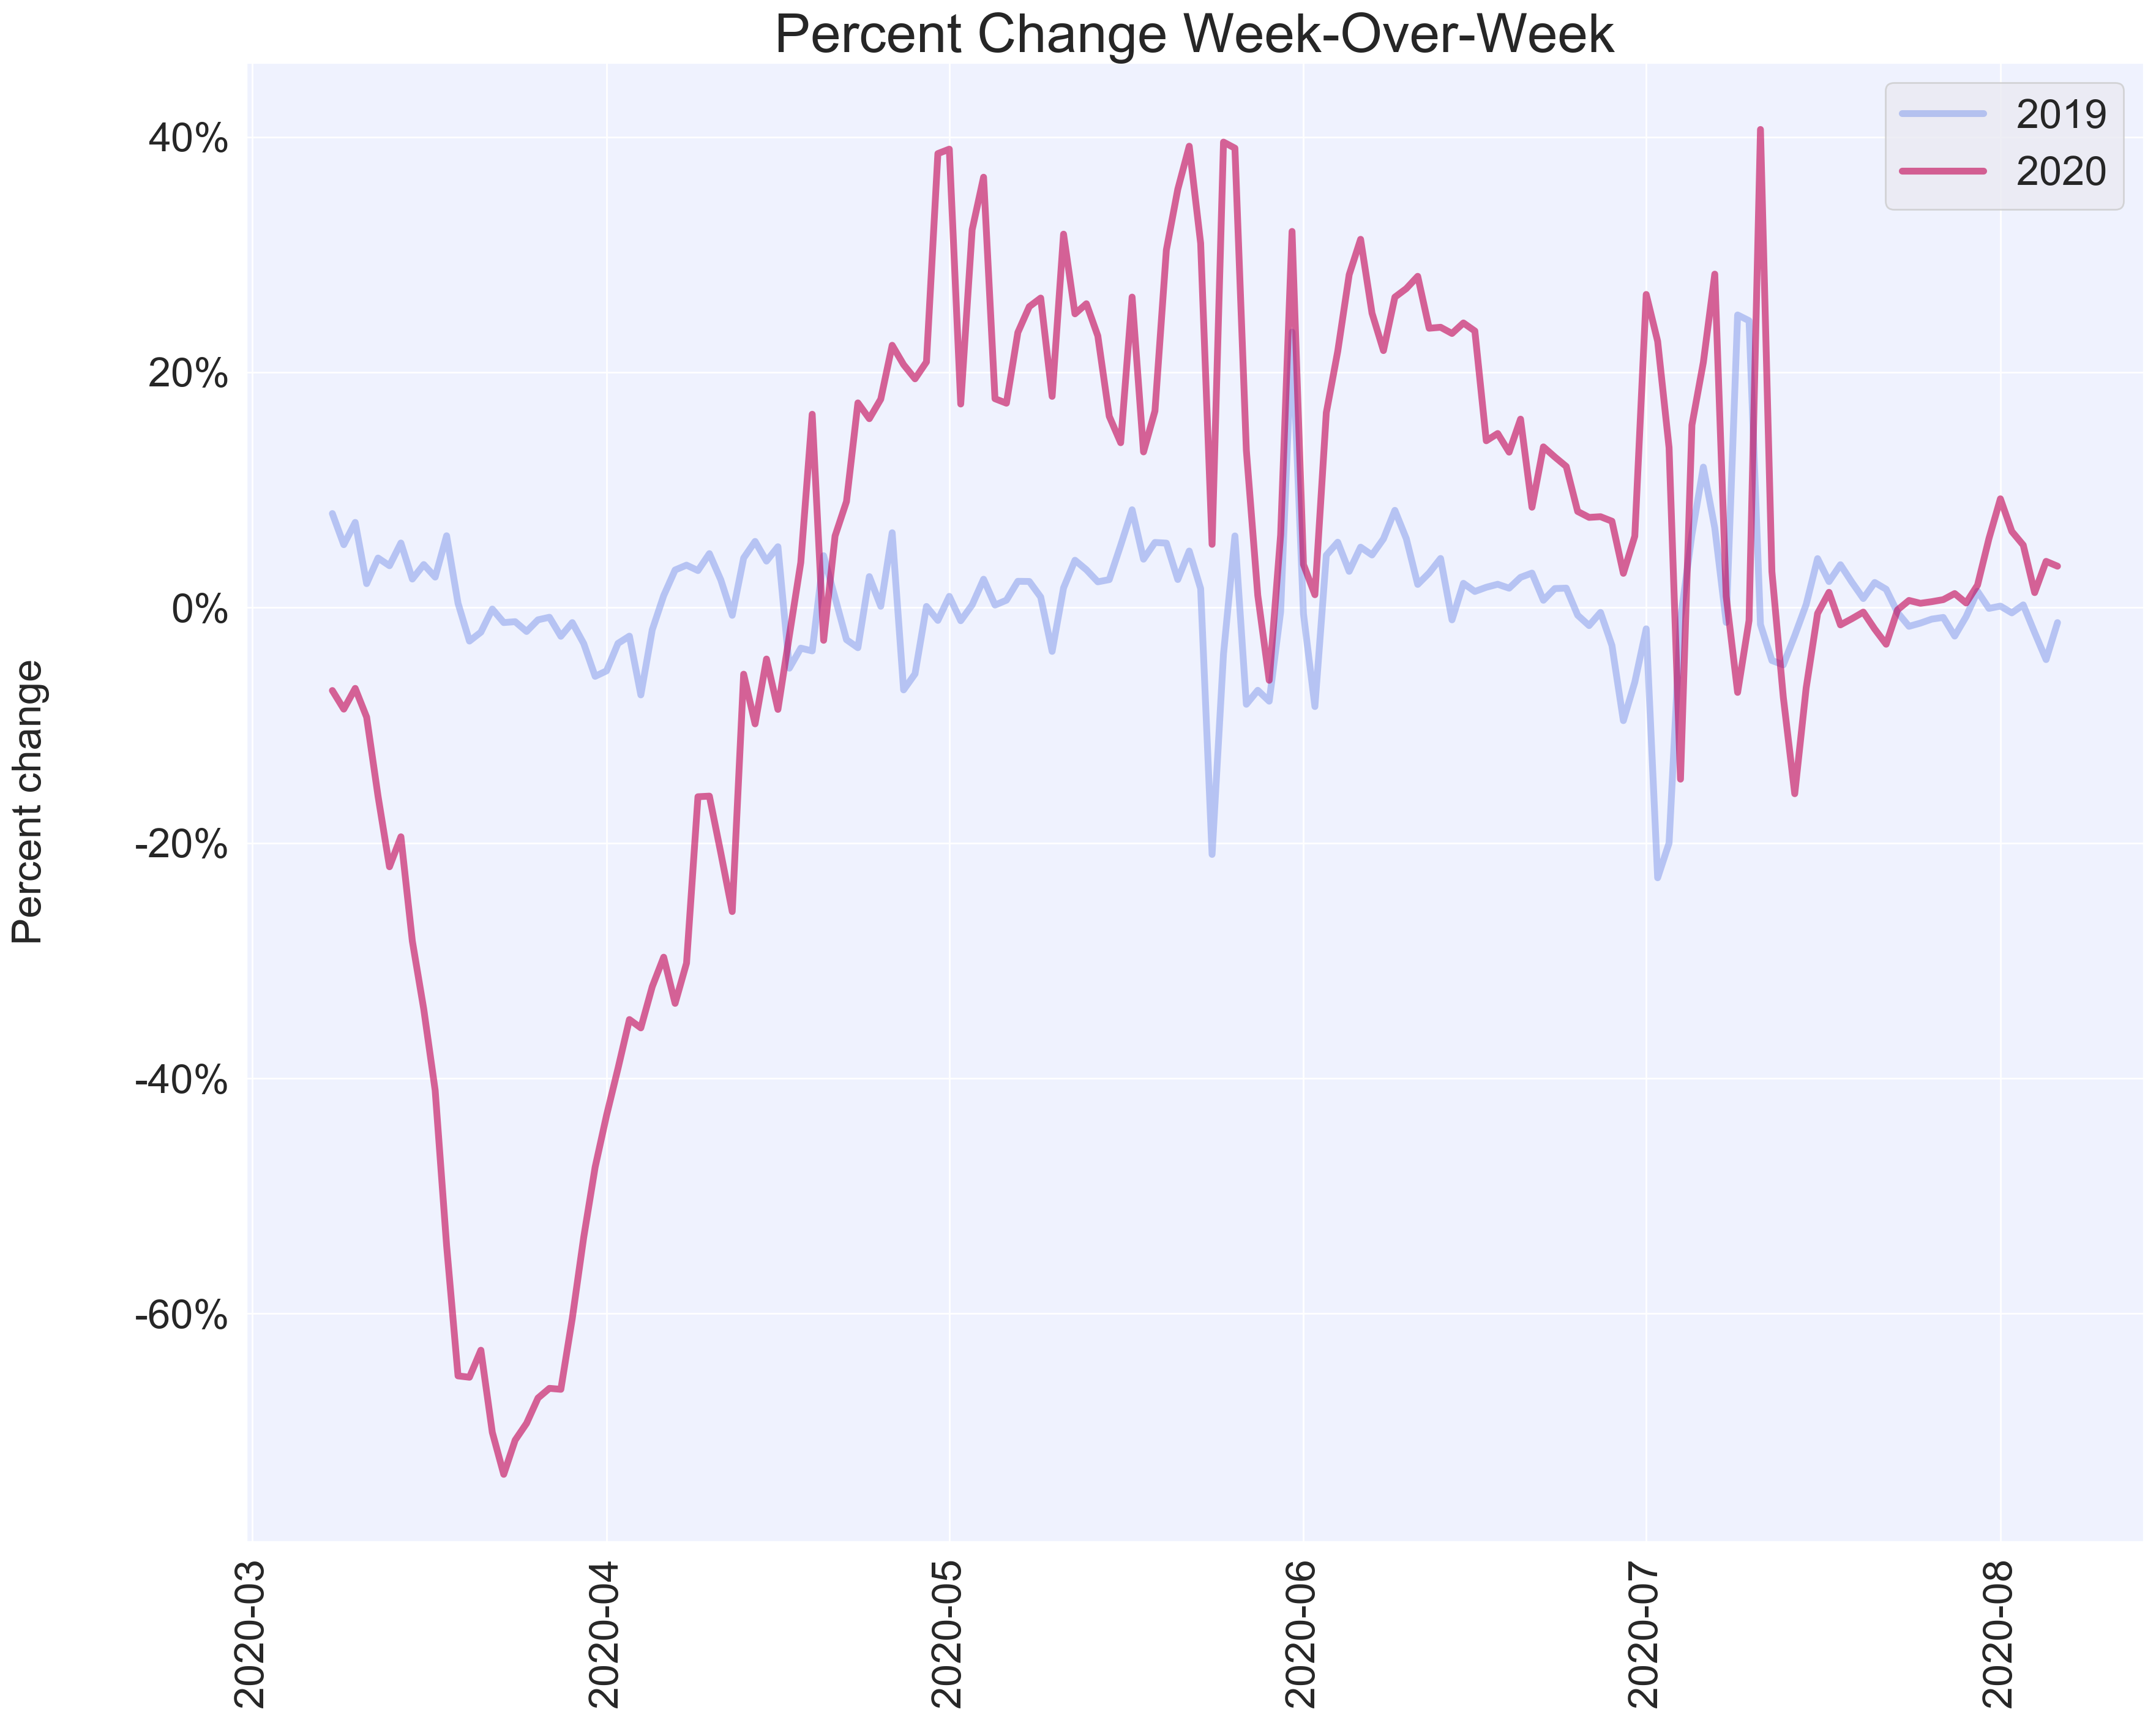

In [7]:
# Distribution of counts
fig, ax = plt.subplots(figsize=(20,16), dpi=200)

ax.plot(tsa['date'], tsa['weekly_percent_change_2019'], color='#90A5ED', alpha=0.6, linewidth=4.0, label='2019')
ax.plot(tsa['date'], tsa['weekly_percent_change_2020'], color='#C20051', alpha=0.6, linewidth=4.0, label='2020')

ax.set_facecolor('#EFF2FE')
ax.set_title('Percent Change Week-Over-Week', fontsize=32)
ax.set_ylabel('Percent change', fontsize=24, labelpad=50)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.xaxis.set_tick_params(rotation=90)
ax.set_yticklabels(['{}%'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.legend(fontsize=24)
plt.savefig('../images/tsa_week_over_week.png', bbox_inches='tight', dpi=200)
plt.show()

### Old Plots:

In [8]:
# plt.figure(figsize=(20,16), dpi=100)
# plt.plot(tsa['date'], tsa['yearly_relative_percent'], linewidth=8.0, c='#C20051')
# plt.title('Relative Percent of Previous Year TSA Traffic', fontsize=32)
# plt.ylabel('Relative Percent', fontsize=24)
# plt.xticks(rotation=90, fontsize=24)
# plt.yticks(fontsize=24)
# plt.savefig('../images/tsa_year_over_year.png', bbox_inches='tight', dpi=200)
# plt.show()

In [9]:
# plt.figure(figsize=(20,16))
# plt.plot(tsa['date'], tsa['weekly_percent_change'], linewidth=8.0, c='#C20051')
# plt.title('Percent Change Week-Over-Week', fontsize=32)
# plt.ylabel('Percent change', fontsize=24)
# plt.xticks(rotation=90, fontsize=24)
# plt.yticks(fontsize=24)
# plt.savefig('../images/tsa_week_over_week.png', bbox_inches='tight', dpi=200)
# plt.show()